In [1]:
import numpy as np
import skimage.io as io
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
band1 = io.imread("band1.gif").flatten()
band2 = io.imread("band2.gif").flatten()
band3 = io.imread("band3.gif").flatten()
band4 = io.imread("band4.gif").flatten()

In [3]:
df1 = pd.DataFrame(np.array([band1,band2,band3,band4]).T,columns=['band1','band2','band3','band4']);df1

,band1,band2,band3,band4
0,41,27,26,42
1,41,27,29,41
2,38,25,26,40
3,38,23,21,39
4,37,23,22,39
...,...,...,...,...
262139,37,22,20,23
262140,37,23,19,23
262141,38,22,20,25
262142,38,23,19,31


# Selecting points

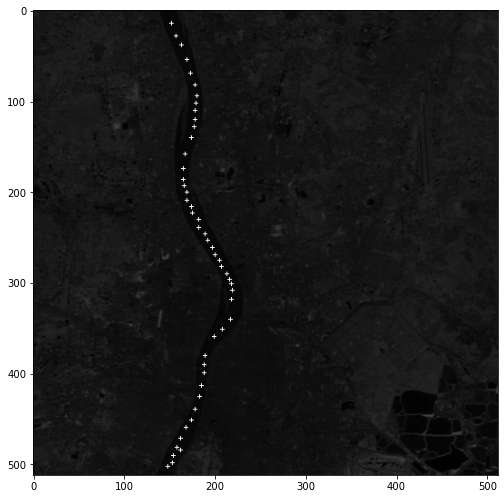

In [4]:
River_sample = io.imread("annotated_band4_np_50.gif")
plt.imshow(River_sample,cmap="gray")
plt.subplots_adjust(right=1.2, top=2.5)
    

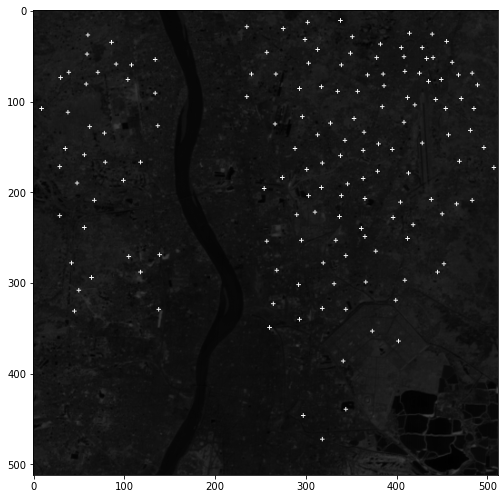

In [5]:
Land_sample = io.imread("annotated_band4_np_150.gif")
plt.imshow(Land_sample,cmap="gray")
plt.subplots_adjust(right=1.2, top=2.5)
    

## Training Data 

In [7]:
river_body = pd.read_csv("river_body_sample.csv")
non_river_body = pd.read_csv("non-river_body_sample.csv")
river_body["index1"] = river_body.row*river_body.column
non_river_body["index1"] = non_river_body.row*non_river_body.column

In [8]:
river_index = river_body.index1
non_river_index = non_river_body.index1
river_train = df1.iloc[river_index,:]
non_river_train = df1.iloc[non_river_index,:]

In [9]:
river_mean = list(river_train.apply(np.mean,axis = 0))
non_river_mean = list(non_river_train.apply(np.mean,axis = 0))
river_cov_mat = np.array(river_train.cov())
non_river_cov_mat = np.array(non_river_train.cov())

## Defining Functions

In [10]:
def Class_Conditonal_Prob(data,mean,cov_mat):
    condi = []
    x = data - mean
    p = np.linalg.inv(cov_mat)
    for i in range(len(data)):
        condi.append((x.iloc[i,:].T)@np.array(p) @np.array((x.iloc[i,:])))
    condi1 = np.exp(0.5*np.array(condi))
    prob =  1/np.sqrt(2*np.pi*np.linalg.det(cov_mat))*np.array(condi1)
    return prob

In [11]:
def prediction(CCP_A,CCP_B,priorA,priorB,Aname,Bname):
    pred = []
    for i in range(len(CCP_A)):
        if priorA*CCP_A[i] >= priorB*CCP_B[i]:
            pred.append(0)
        else :
            pred.append(1)
    k = np.array(pred).reshape(512,512)
    plt.subplot(1,1,1)
    plt.imshow(k,cmap="gray")
    plt.subplots_adjust(right=1.2, top=2.5)
    T = f"Black for {Aname}  White for {Bname}"
    print(T)

## Calculating Class Conditional Probalities

In [12]:
river_prob = Class_Conditonal_Prob(df1,river_mean,river_cov_mat)

In [13]:
non_river_prob = Class_Conditonal_Prob(df1,non_river_mean,non_river_cov_mat)

## Predicting The Images

## P1 = 0.5 ; P2 = 0.5

In [14]:
priorR = 0.5
priorNR = 0.5

Black for River  White for Non-River


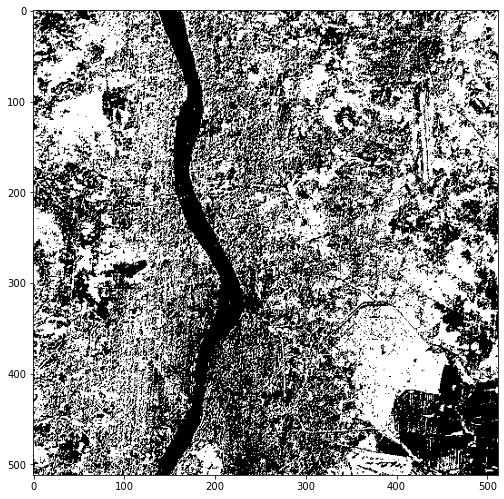

In [15]:
prediction(river_prob,non_river_prob,priorR,priorNR,"River","Non-River")

## P1 = 0.8 ; P2 = 0.2

In [16]:
priorR = 0.8
priorNR = 0.2

Black for River  White for Non-River


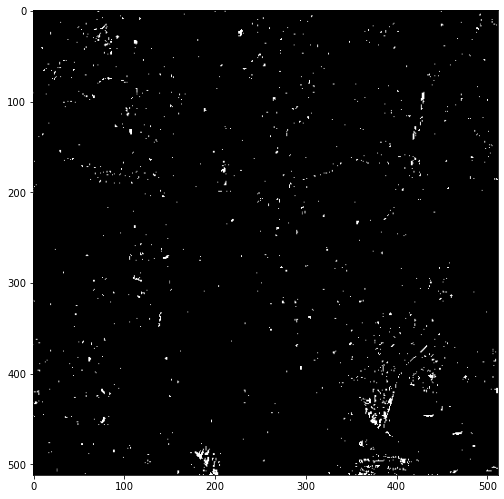

In [17]:
prediction(river_prob,non_river_prob,priorR,priorNR,"River","Non-River")

## P1 = 0.2 ; P2 = 0.8

In [18]:
priorR = 0.2
priorNR = 0.8

Black for River  White for Non-River


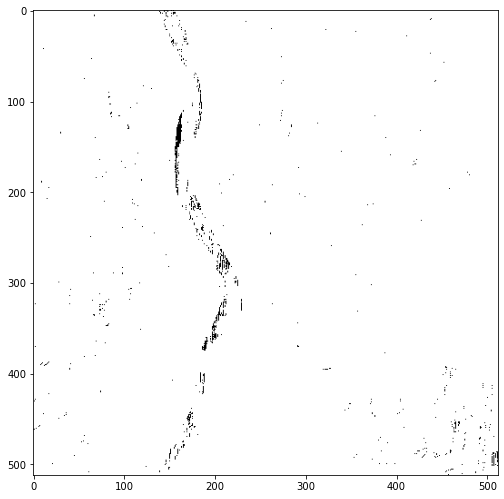

In [19]:
prediction(river_prob,non_river_prob,priorR,priorNR,"River","Non-River")